# Figure 2: AL performance

## Enrichment with cutoff p=10%

### DMS dataset (Bloom)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys

sys.path.append("../src")
sys.path.append("../Marian")

from utils import *
from hist_al import *



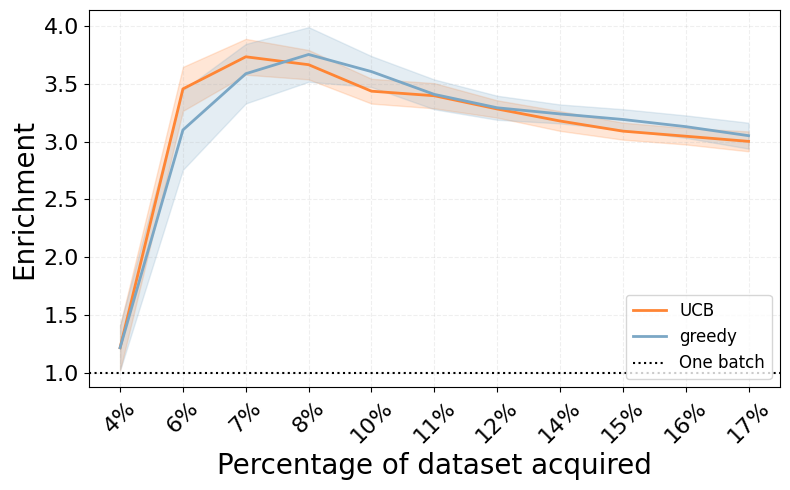

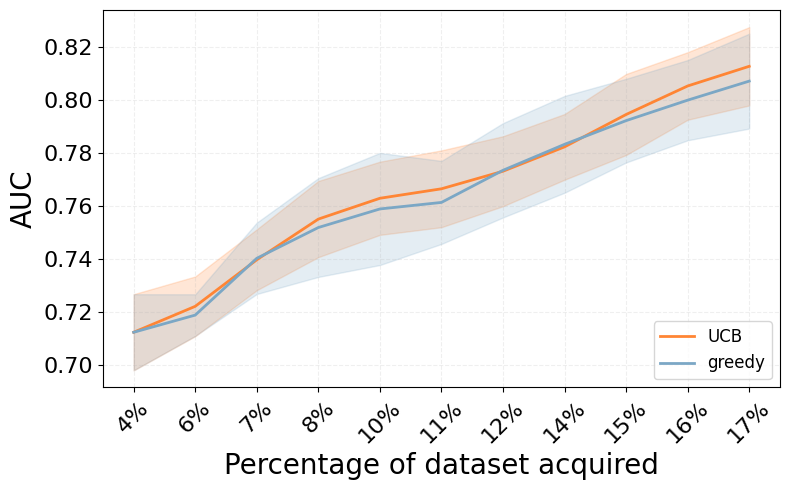

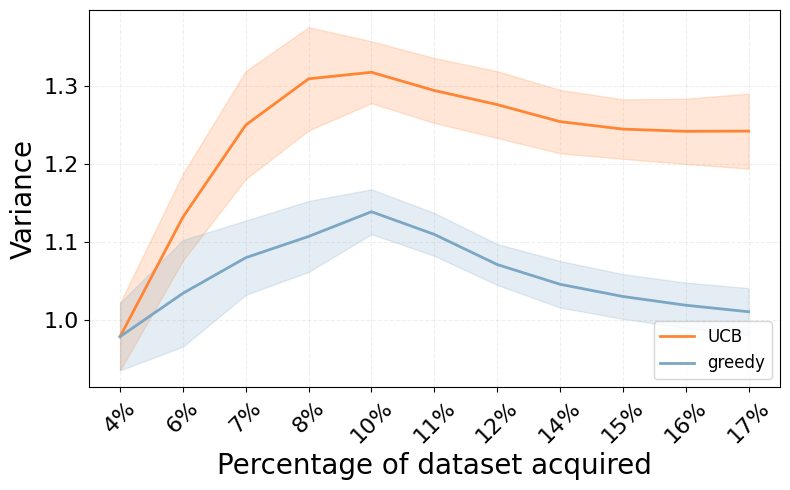

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys

sys.path.append("../src")
sys.path.append("../Marian")

from utils import *
from hist_al import *





data_dir = '../script_results/hist_al_bloom_esm3_coord'
strategies = ['UCB', 'greedy']
metrics = ['p', 'r', 'var']
metrics_name_dic = {'p': 'Enrichment', 'r': 'AUC', 'var': 'Variance'}
NB_POINTS = 50
NB_ROUNDS = 10
NB_0 = 165

points_list = np.array([NB_0 + i * NB_POINTS for i in range(NB_ROUNDS + 1)]) / 3803

colors = {
    'random': '#2E8B99',  # darker teal/turquoise
    'UCB': '#FF8534',     # darker orange/peach
    'greedy': '#7BA7C5'   # darker light blue
}
for metric in metrics:
    plt.figure(figsize=(8, 5))
    # plt.title(f'{metrics_name_dic[metric]} for Different Strategies, Bloom', fontsize=16)
    plt.xlabel('Percentage of dataset acquired', fontsize=20)  # Updated label
    plt.ylabel(metrics_name_dic[metric], fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.2)
    
    # Convert points_list to percentages and round to integers
    percentage_points_list = np.round(points_list * 100).astype(int)
    
    # Set xticks as percentages
    plt.xticks(points_list[:len(percentage_points_list)],  # Use original points_list for positioning
               [f"{x}%" for x in percentage_points_list],  # Format as percentages
               fontsize=16, rotation=45)
    plt.yticks(fontsize=16)
    
    # Create empty lists to store plot handles and labels for legend
    handles = []
    labels = []
    mean_file_onebatch = f'greedy_mean_{metric}.npy'
    std_file_onebatch = f'greedy_std_{metric}.npy'

    # First plot UCB and greedy lines
    for strategy in strategies:
        mean_file = f'{strategy}_mean_{metric}.npy'
        std_file = f'{strategy}_std_{metric}.npy'
        mean_path = os.path.join(data_dir, mean_file)
        std_path = os.path.join(data_dir, std_file)

      


        
        if os.path.exists(mean_path) and os.path.exists(std_path):
            mean_data = np.load(mean_path)
            std_data = np.load(std_path)

 
            
            if metric == "p":
                mean_data = mean_data / points_list
                std_data = std_data / points_list



          
            line = plt.plot(points_list[:len(mean_data)],  # Use points_list for x-axis
                            mean_data,
                            label=f'{strategy}',
                            color=colors[strategy],
                            linewidth=2)[0]
            plt.fill_between(
                points_list[:len(mean_data)],  # Use points_list for x-axis
                mean_data - std_data,
                mean_data + std_data,
                color=colors[strategy],
                alpha=0.2
            )
            handles.append(line)
            labels.append(strategy)

    
    
            

        else:
            print(f"Warning: Missing files for {strategy} - {metric}")


    # add grey zone of size std_data_onebatch[-1]
    labels.extend(['One batch'])
    
    # Then add horizontal lines
    if metric == "p":
        random_line = plt.axhline(y=1, color='black', linestyle=':', linewidth=1.5, label='Random Baseline')

        labels.extend(['Random Baseline'])
        handles.append(random_line)

    

    plt.legend(handles, labels, fontsize=12, title_fontsize='13', loc='lower right')
    plt.tight_layout()
    # plt.savefig(f'../figures/{metrics_name_dic[metric]}_bloom.eps', dpi=1200, bbox_inches='tight')
    plt.savefig(f'../figures/{metrics_name_dic[metric]}_bloom_high_res.png', dpi=1200, bbox_inches='tight')
    plt.show()



### CM dataset (Desai)

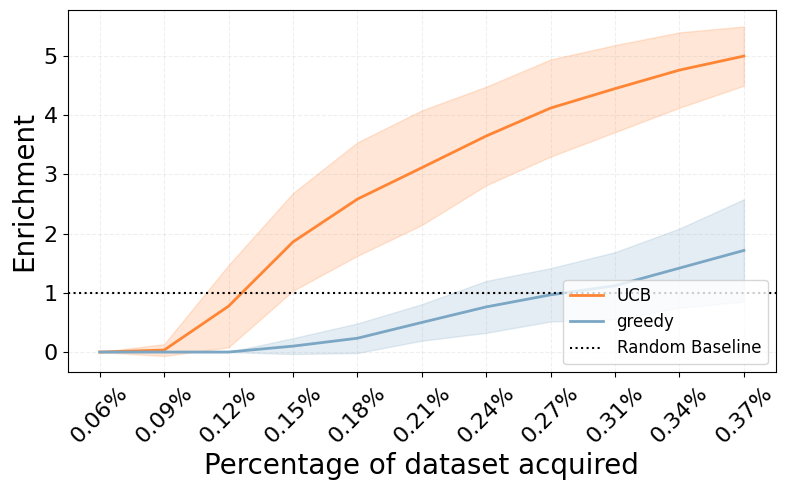

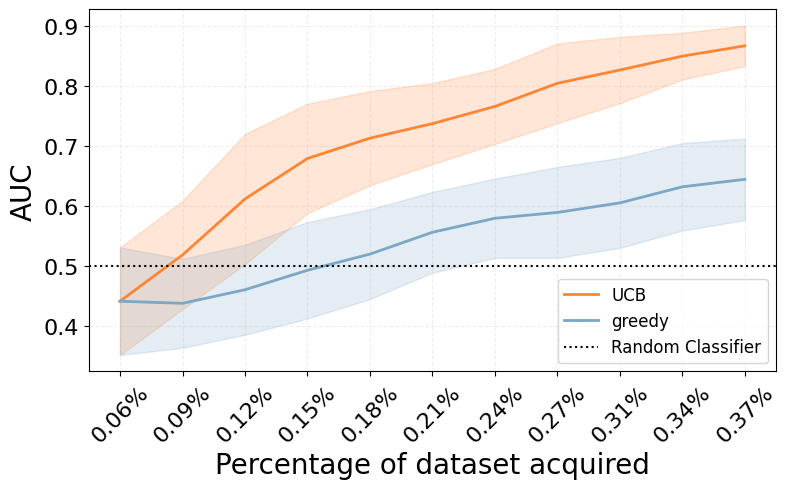

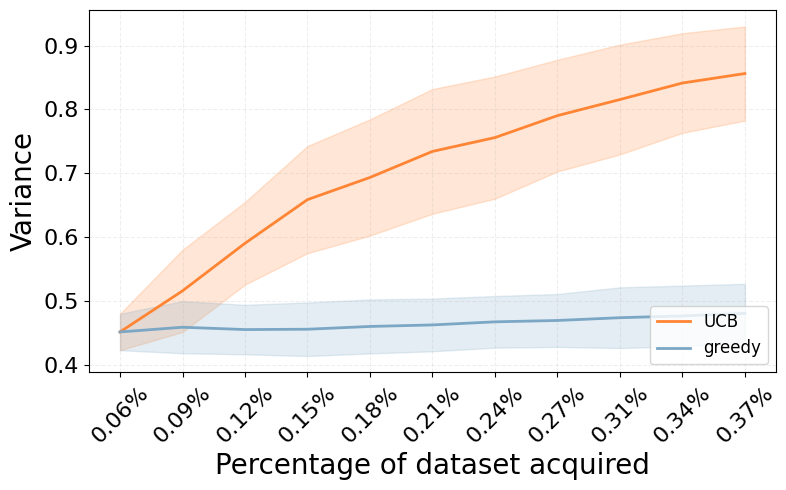

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


# Define the directory where the files are located
data_dir = '../script_results/hist_al_desai_esm3_coord'

# Define strategies and metrics
strategies = ['UCB', 'greedy']
metrics = ['p', 'r', 'var']
metrics_name_dic = {'p': 'Enrichment', 'r': 'AUC', 'var': 'Variance'}
NB_POINTS = 10
NB_ROUNDS = 10  # 5
NB_RUNS = 10  # 3
NB_0 = 20
points_list = np.array([NB_0 + i * NB_POINTS for i in range(NB_ROUNDS + 1)]) / 32768



colors = {
    'random': '#2E8B99',  # darker teal/turquoise
    'UCB': '#FF8534',     # darker orange/peach
    'greedy': '#7BA7C5'   # darker light blue
}
for metric in metrics:
    plt.figure(figsize=(8, 5))
    # plt.title(f'{metrics_name_dic[metric]} for Different Strategies, Bloom', fontsize=16)
    plt.xlabel('Percentage of dataset acquired', fontsize=20)  # Updated label
    plt.ylabel(metrics_name_dic[metric], fontsize=20)
    plt.grid(True, linestyle='--', alpha=0.2)
    
    # Convert points_list to percentages and round to integers
    percentage_points_list = np.round(points_list * 100,2)
    
    # Set xticks as percentages
    plt.xticks(points_list[:len(percentage_points_list)],  # Use original points_list for positioning
               [f"{x}%" for x in percentage_points_list],  # Format as percentages
               fontsize=16, rotation=45)
    plt.yticks(fontsize=16)
    
    # Create empty lists to store plot handles and labels for legend
    handles = []
    labels = []
    mean_file_onebatch = f'greedy_mean_{metric}.npy'
    std_file_onebatch = f'greedy_std_{metric}.npy'


    # First plot UCB and greedy lines
    for strategy in strategies:
        mean_file = f'{strategy}_mean_{metric}.npy'
        std_file = f'{strategy}_std_{metric}.npy'
        mean_path = os.path.join(data_dir, mean_file)
        std_path = os.path.join(data_dir, std_file)

      


        
        if os.path.exists(mean_path) and os.path.exists(std_path):
            mean_data = np.load(mean_path)
            std_data = np.load(std_path)

   
            
            if metric == "p":
                mean_data = mean_data / points_list
                std_data = std_data / points_list


          
            line = plt.plot(points_list[:len(mean_data)],  # Use points_list for x-axis
                            mean_data,
                            label=f'{strategy}',
                            color=colors[strategy],
                            linewidth=2)[0]
            plt.fill_between(
                points_list[:len(mean_data)],  # Use points_list for x-axis
                mean_data - std_data,
                mean_data + std_data,
                color=colors[strategy],
                alpha=0.2
            )
            handles.append(line)
            labels.append(strategy)

    
    
            

        else:
            print(f"Warning: Missing files for {strategy} - {metric}")


    # add grey zone of size std_data_onebatch[-1]
    
    # Then add horizontal lines
    if metric == "p":
        random_line = plt.axhline(y=1, color='black', linestyle=':', linewidth=1.5, label='Random Baseline')
        handles.extend([random_line])

        labels.extend(['Random Baseline'])
    
    
    elif metric == "r":
        random_line = plt.axhline(y=0.5, color='black', linestyle=':', linewidth=1.5, label='Random Baseline')

        # end_2020_line = plt.axhline(y=auc_end_2020, color='green', linestyle=':', linewidth=1.5, 
        #                            label='Direct fitness prediction end 2021')
        # end_2021_line = plt.axhline(y=auc_end_2021, color='red', linestyle=':', linewidth=1.5, 
        #                            label='Direct fitness prediction end 2022')
        # handles.extend([end_2020_line, end_2021_line])
        handles.extend([random_line])
        labels.extend(['Random Classifier'])

    plt.legend(handles, labels, fontsize=12, title_fontsize='13', loc='lower right')
    plt.tight_layout()
    plt.savefig(f'../figures/{metrics_name_dic[metric]}_Desai_high_res.png', dpi=1200, bbox_inches='tight')

    plt.show()


## UCB enrichment for different cutoffs

### CM dataset (Desai)

In [8]:
df, X_df, y, targets = load_and_preprocess_data('esm3_coord', 'desai')
pheno_columns=['delta_log_kd_ACE2', 'delta_log_kd_LY-CoV016', 'delta_log_kd_REGN10987', 'delta_log_kd_LY-CoV555', 'delta_log_kd_S309']
pheno=df[pheno_columns]
#to numpy
pheno=pheno.to_numpy()
print(pheno.shape)
fitnesses=bio_model(pheno)
print(fitnesses.shape)




e:\VIRAL\plots\../src\utils.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load(file_path)  # Load the tensor


loaded embeddings of shape torch.Size([32768, 1536])
(32768, 5)
(32768,)


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Parameters
p_values = [1,5, 10,  20, ]  # Percentages for enrichment
num_rounds = 10  # Number of rounds
NB_POINTS = 10

# Enrichment function
def compute_enrichment(index_set, fitnesses, threshold, p):
    fitness_set = fitnesses[list(index_set)]
    num_above_threshold = np.sum(fitness_set >= threshold)
    enrichment = (100* num_above_threshold) / len(fitness_set)/p if len(fitness_set) > 0 else 0
    return enrichment

# Prepare data for all p-values
all_p_enrichments = {p: [] for p in p_values}
simulation_files_ucb = sorted(glob.glob("../script_results/hist_al_desai_esm3_coord/training_indices_history_UCB_run_*.csv"))
simulation_files_greedy = sorted(glob.glob("../script_results/hist_al_desai_esm3_coord/training_indices_history_greedy_run_*.csv"))
# Collect mean and standard deviation for each p-value across simulations
def get_enricment(p_values, simulation_files, num_rounds, fitnesses):
    mean_enrichments = {p: [] for p in p_values}
    std_enrichments = {p: [] for p in p_values}

    for p in p_values:
        # Compute threshold
        top_percent_indexes = np.argsort(fitnesses, axis=0)[-int(p * len(fitnesses) / 100):]
        threshold_percent = np.min(fitnesses[top_percent_indexes])

        # Process simulations for this p
        simulation_enrichments = []

        for file_path in simulation_files:
            data = pd.read_csv(file_path)
            init_indexes = data.columns.astype(int)
            indexes_matrix = np.array(data.values, dtype=float)[:, :NB_POINTS].astype(int)

            current_indexes = set(init_indexes)
            enrichment_per_round = [compute_enrichment(current_indexes, fitnesses, threshold_percent, p)]

            for round_idx in range(num_rounds):
                current_indexes.update(indexes_matrix[round_idx, :])
                enrichment = compute_enrichment(current_indexes, fitnesses, threshold_percent, p)
                enrichment_per_round.append(enrichment)

            simulation_enrichments.append(enrichment_per_round)

        simulation_enrichments = np.array(simulation_enrichments)
        mean_enrichments[p] = np.mean(simulation_enrichments, axis=0)
        std_enrichments[p] = np.std(simulation_enrichments, axis=0)
    
    return mean_enrichments, std_enrichments

mean_enrichments, std_enrichments = get_enricment(p_values, simulation_files_ucb, num_rounds, fitnesses)
mean_enrichments_greedy, std_enrichments_greedy = get_enricment(p_values, simulation_files_greedy, num_rounds, fitnesses)



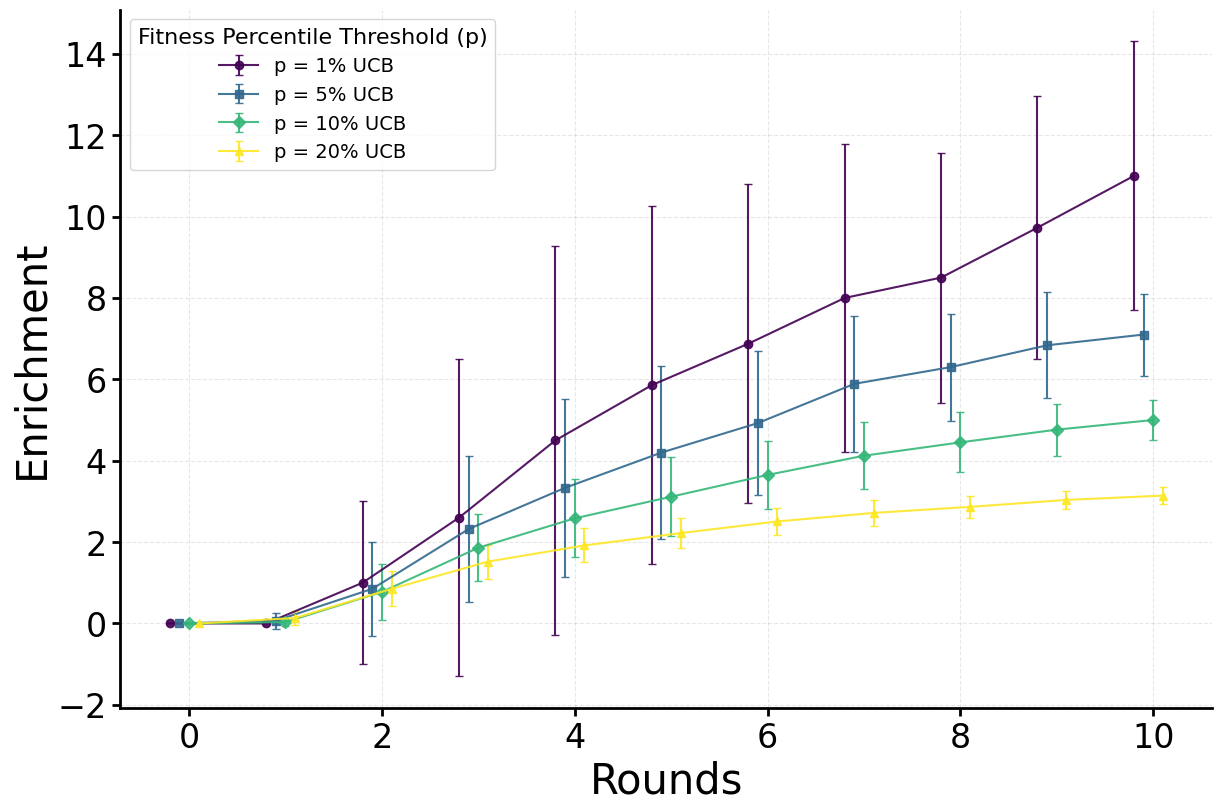

In [10]:
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(p_values)))  # Color map for p-values
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X']  # Variety of markers
offset = 0.1  # Horizontal offset to avoid overlap

for idx, (p, color) in enumerate(zip(p_values, colors)):
    x_vals = np.array(range(num_rounds + 1)) + (idx - len(p_values) / 2) * offset
    plt.errorbar(
        x_vals,
        mean_enrichments[p],
        yerr=std_enrichments[p],
        label=f'p = {p}% UCB',
        linewidth=1.5,
        marker=markers[idx % len(markers)],
        markersize=6,
        color=color,
        capsize=3,
        alpha=0.9,
        fmt='-',
    )

plt.xlabel('Rounds', fontsize=30)
plt.ylabel('Enrichment', fontsize=30)
plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.legend(title='Fitness Percentile Threshold (p)', title_fontsize=16, fontsize=14, loc='upper left', frameon=True)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='both', colors='black', labelsize=24, width=2, length=6)

plt.savefig('../figures/enrichment_desai_vs_rounds_with_error_bars.png', dpi=1200, bbox_inches='tight')
plt.show()


In [11]:
# Compute max enrichment for each p across rounds
max_enrichments_ucb = [np.max(mean_enrichments[p]) for p in p_values]
max_enrichments_greedy = [np.max(mean_enrichments_greedy[p]) for p in p_values]




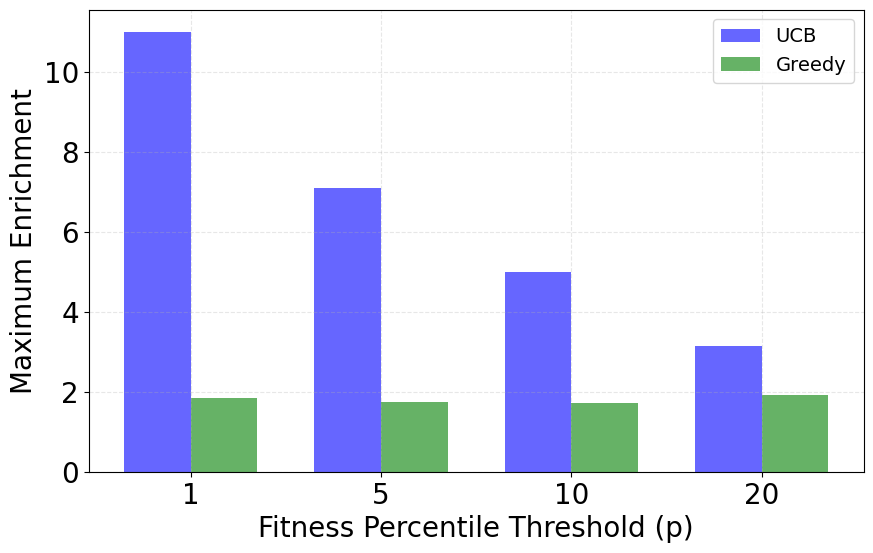

In [12]:
plt.figure(figsize=(10, 6))

# Set bar width and positions
bar_width = 0.35
x = np.arange(len(p_values))

# Create bars
plt.bar(x - bar_width/2, max_enrichments_ucb, bar_width, label='UCB', 
        color='blue', alpha=0.6)
plt.bar(x + bar_width/2, max_enrichments_greedy, bar_width, label='Greedy',
        color='green', alpha=0.6)

plt.xlabel('Fitness Percentile Threshold (p)', fontsize=20)
plt.ylabel('Maximum Enrichment', fontsize=20)
# plt.title('Maximum Enrichment vs Percentage Threshold (p)', 
#           fontsize=16, fontweight='bold', pad=20)

plt.xticks(x, p_values, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('../figures/max_enrichment_vs_p_barplot.png', dpi=1200, bbox_inches='tight')


# Comparison greedy vs UCB on CM dataset

C:\Users\maria\AppData\Local\Temp\ipykernel_10708\124397897.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(


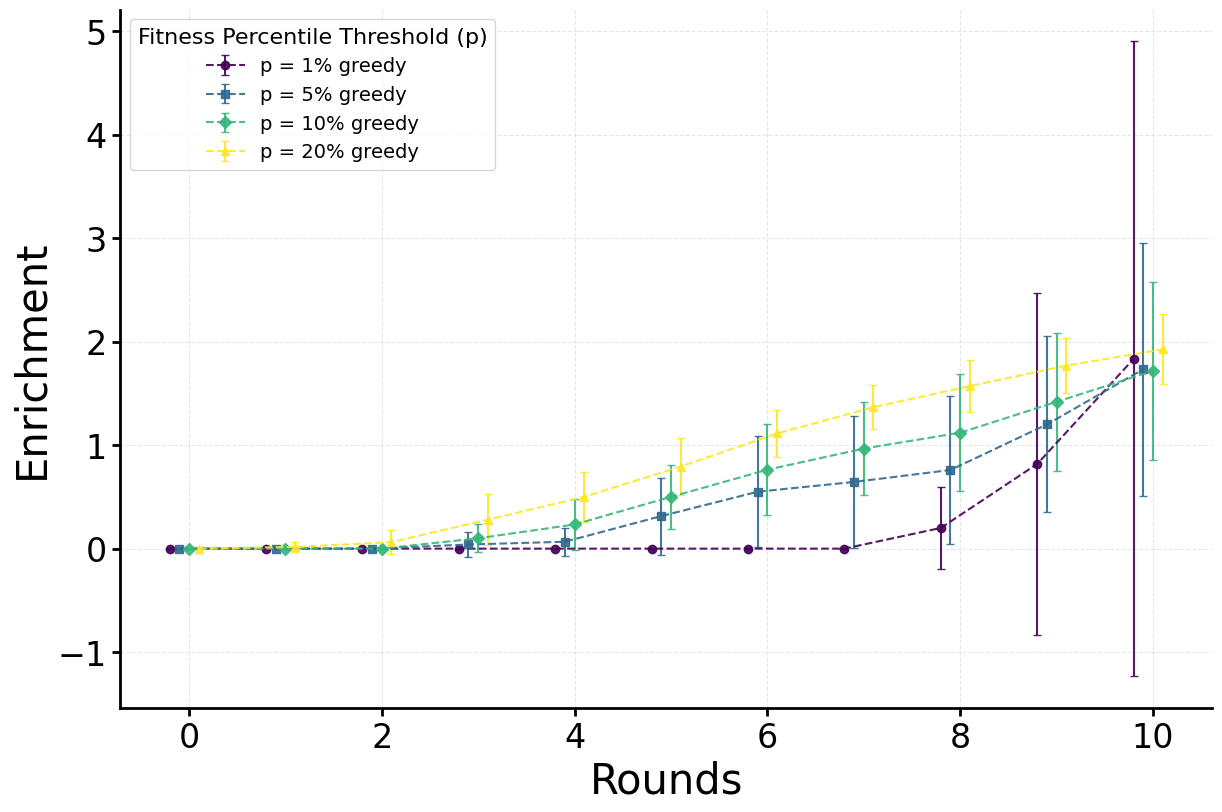

In [16]:
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(p_values)))  # Color map for p-values
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X']  # Variety of markers
offset = 0.1  # Horizontal offset to avoid overlap

for idx, (p, color) in enumerate(zip(p_values, colors)):
    x_vals = np.array(range(num_rounds + 1)) + (idx - len(p_values) / 2) * offset
    plt.errorbar(
        x_vals,
        mean_enrichments_greedy[p],
        yerr=std_enrichments_greedy[p],
        label=f'p = {p}% greedy',
        linewidth=1.5,
        linestyle='--',
        marker=markers[idx % len(markers)],
        markersize=6,
        color=color,
        capsize=3,
        alpha=0.9,
        fmt='-'
    )

plt.xlabel('Rounds', fontsize=30)
plt.ylabel('Enrichment', fontsize=30)
plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.legend(title='Fitness Percentile Threshold (p)', title_fontsize=16, fontsize=14, loc='upper left', frameon=True)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='both', colors='black', labelsize=24, width=2, length=6)

plt.savefig('../figures/greedy_enrichment_desai_vs_rounds_with_error_bars.png', dpi=1200, bbox_inches='tight')
plt.show()


### Greedy

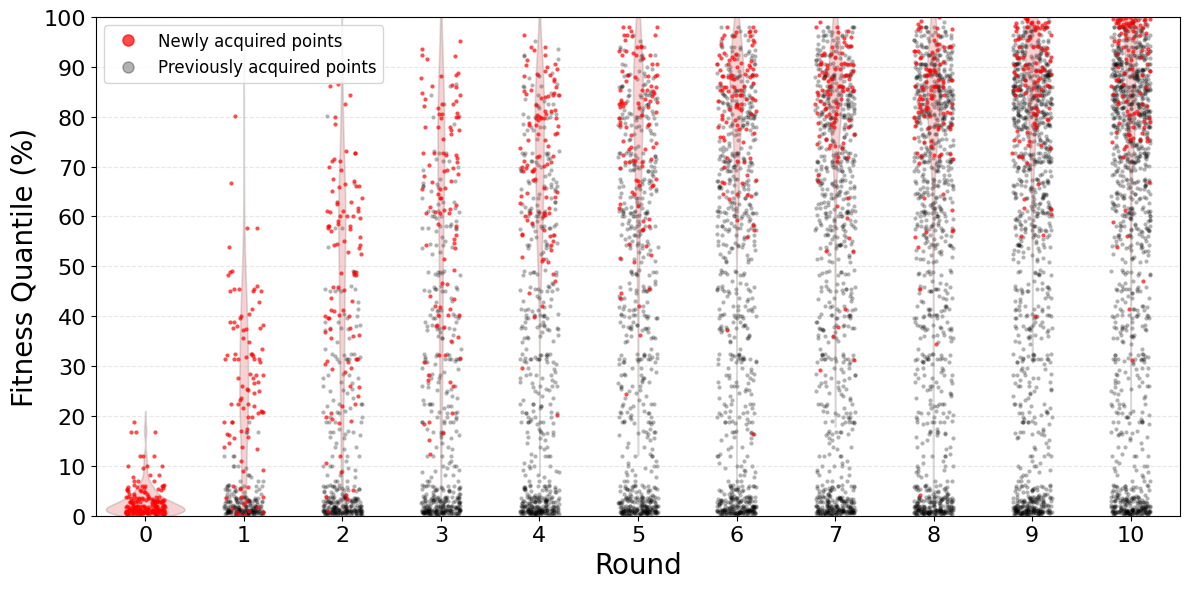

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob

# Parameters
num_rounds = 10
NB_POINTS = 10

# Load simulation files
simulation_files = sorted(glob.glob("../script_results/hist_al_desai_esm3_coord/training_indices_history_greedy_run_*.csv"))

# Compute quantile mapping for full fitness distribution
fitness_ranks = pd.Series(fitnesses).rank(method='average', pct=True) * 100  # percentiles
fitness_quantile_map = dict(zip(np.arange(len(fitnesses)), fitness_ranks))

# Initialize per-round containers
quantiles_new = {r: [] for r in range(num_rounds + 1)}  # Red
quantiles_old = {r: [] for r in range(num_rounds + 1)}  # Black

# Accumulate data
for file_path in simulation_files:
    data = pd.read_csv(file_path)
    init_indices = set(data.columns.astype(int))
    rounds_matrix = np.array(data.values[:, :NB_POINTS], dtype=int)

    # Add initial indices as new in round 0
    quantiles_new[0].extend([fitness_quantile_map[i] for i in init_indices])

    # Add initial indices to old in all rounds after 0
    for rr in range(1, num_rounds + 1):
        quantiles_old[rr].extend([fitness_quantile_map[i] for i in init_indices])

    # Add acquired points from each round
    for r in range(num_rounds):
        round_indices = set(rounds_matrix[r])
        # Add new points for this round
        quantiles_new[r + 1].extend([fitness_quantile_map[i] for i in round_indices])

        # Add these points to old in all future rounds
        for rr in range(r + 2, num_rounds + 1):
            quantiles_old[rr].extend([fitness_quantile_map[i] for i in round_indices])

# Convert to DataFrames for plotting
df_new = pd.DataFrame([
    {"round": r, "quantile": q, "status": "new"}
    for r in sorted(quantiles_new.keys()) for q in quantiles_new[r]
])
df_old = pd.DataFrame([
    {"round": r, "quantile": q, "status": "old"}
    for r in sorted(quantiles_old.keys()) for q in quantiles_old[r]
])
df_all = pd.concat([df_new, df_old], ignore_index=True)

# === Plot ===
plt.figure(figsize=(12, 6))

round_order = list(range(num_rounds + 1))  # Ensures 0 appears first

# Old = black
sns.stripplot(
    x='round', y='quantile',
    data=df_all[df_all['status'] == 'old'],
    jitter=0.2, size=3, color='black', alpha=0.3, zorder=1,
    order=round_order
)

# New = red
sns.stripplot(
    x='round', y='quantile',
    data=df_all[df_all['status'] == 'new'],
    jitter=0.2, size=3, color='red', alpha=0.7, zorder=2,
    order=round_order
)
# Violin KDEs for red (new) points only
sns.violinplot(
    x='round', y='quantile',
    data=df_all[df_all['status'] == 'new'],
    order=round_order,
    inner=None, linewidth=1.2,
    color='red', alpha=0.2
)



# Aesthetics
plt.xlabel('Round', fontsize=20)
plt.ylabel('Fitness Quantile (%)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(np.arange(0, 110, 10), fontsize=16)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

#legend: red for new, black for old
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='red', label='Newly acquired points',
           markersize=8, linestyle='None', alpha=0.7),
    Line2D([0], [0], marker='o', color='black', label='Previously acquired points',
           markersize=8, linestyle='None', alpha=0.3)
]

plt.legend(handles=legend_elements, fontsize=12, frameon=True, loc='upper left', title_fontsize=13)


# Save
plt.savefig("../figures/greedy_desai_quantile_stripplot_new_vs_old.png", dpi=1200, bbox_inches='tight')
plt.show()


### UCB

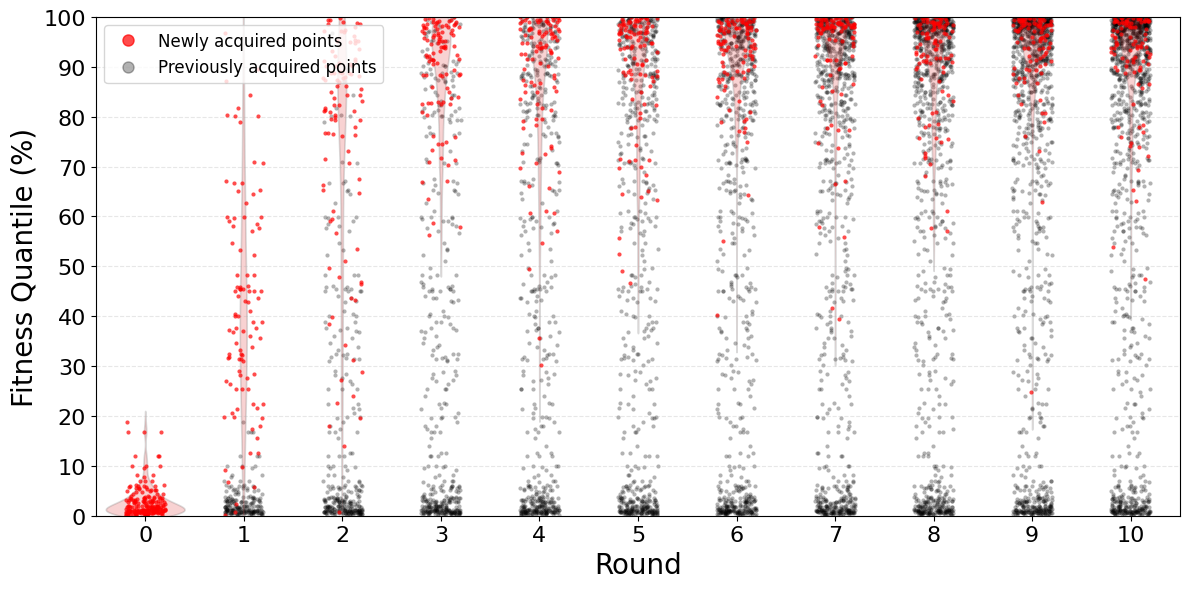

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob

# Parameters
num_rounds = 10
NB_POINTS = 10

# Load simulation files
simulation_files = sorted(glob.glob("../script_results/hist_al_desai_esm3_coord/training_indices_history_UCB_run_*.csv"))

# Compute quantile mapping for full fitness distribution
fitness_ranks = pd.Series(fitnesses).rank(method='average', pct=True) * 100  # percentiles
fitness_quantile_map = dict(zip(np.arange(len(fitnesses)), fitness_ranks))

# Initialize per-round containers
quantiles_new = {r: [] for r in range(num_rounds + 1)}  # Red
quantiles_old = {r: [] for r in range(num_rounds + 1)}  # Black

# Accumulate data
for file_path in simulation_files:
    data = pd.read_csv(file_path)
    init_indices = set(data.columns.astype(int))
    rounds_matrix = np.array(data.values[:, :NB_POINTS], dtype=int)

    # Add initial indices as new in round 0
    quantiles_new[0].extend([fitness_quantile_map[i] for i in init_indices])

    # Add initial indices to old in all rounds after 0
    for rr in range(1, num_rounds + 1):
        quantiles_old[rr].extend([fitness_quantile_map[i] for i in init_indices])

    # Add acquired points from each round
    for r in range(num_rounds):
        round_indices = set(rounds_matrix[r])
        # Add new points for this round
        quantiles_new[r + 1].extend([fitness_quantile_map[i] for i in round_indices])

        # Add these points to old in all future rounds
        for rr in range(r + 2, num_rounds + 1):
            quantiles_old[rr].extend([fitness_quantile_map[i] for i in round_indices])

# Convert to DataFrames for plotting
df_new = pd.DataFrame([
    {"round": r, "quantile": q, "status": "new"}
    for r in sorted(quantiles_new.keys()) for q in quantiles_new[r]
])
df_old = pd.DataFrame([
    {"round": r, "quantile": q, "status": "old"}
    for r in sorted(quantiles_old.keys()) for q in quantiles_old[r]
])
df_all = pd.concat([df_new, df_old], ignore_index=True)

# === Plot ===
plt.figure(figsize=(12, 6))

round_order = list(range(num_rounds + 1))  # Ensures 0 appears first

# Old = black
sns.stripplot(
    x='round', y='quantile',
    data=df_all[df_all['status'] == 'old'],
    jitter=0.2, size=3, color='black', alpha=0.3, zorder=1,
    order=round_order
)

# New = red
sns.stripplot(
    x='round', y='quantile',
    data=df_all[df_all['status'] == 'new'],
    jitter=0.2, size=3, color='red', alpha=0.7, zorder=2,
    order=round_order
)
# Violin KDEs for red (new) points only
sns.violinplot(
    x='round', y='quantile',
    data=df_all[df_all['status'] == 'new'],
    order=round_order,
    inner=None, linewidth=1.2,
    color='red', alpha=0.2
)



# Aesthetics
plt.xlabel('Round', fontsize=20)
plt.ylabel('Fitness Quantile (%)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(np.arange(0, 110, 10), fontsize=16)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

#legend: red for new, black for old
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='red', label='Newly acquired points',
           markersize=8, linestyle='None', alpha=0.7),
    Line2D([0], [0], marker='o', color='black', label='Previously acquired points',
           markersize=8, linestyle='None', alpha=0.3)
]

plt.legend(handles=legend_elements, fontsize=12, frameon=True, loc='upper left', title_fontsize=13)


# Save
plt.savefig("../figures/ucb_desai_quantile_stripplot_new_vs_old.png", dpi=1200, bbox_inches='tight')
plt.show()
